<a href="https://colab.research.google.com/github/ShivaniBebi/landslide/blob/main/Landslide_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/catalog (1).csv')
print(df.head())
print(df.info())
print(df.describe())


   id     date   time continent_code   country_name country_code  \
0  34   3/2/07  Night            NaN  United States           US   
1  42  3/22/07    NaN            NaN  United States           US   
2  56   4/6/07    NaN            NaN  United States           US   
3  59  4/14/07    NaN            NaN         Canada           CA   
4  61  4/15/07    NaN            NaN  United States           US   

  state/province  population         city/town  distance  ...  \
0       Virginia       16000       Cherry Hill   3.40765  ...   
1           Ohio       17288  New Philadelphia   3.33522  ...   
2   Pennsylvania       15930       Wilkinsburg   2.91977  ...   
3         Quebec       42786       Châteauguay   2.98682  ...   
4       Kentucky        6903         Pikeville   5.66542  ...   

                                 geolocation  hazard_type      landslide_type  \
0  (38.600900000000003, -77.268199999999993)    Landslide           Landslide   
1  (40.517499999999998, -81.4304999999

In [3]:
df.head(5)

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [4]:
df_clean = df.dropna()
df['trigger'] = df['trigger'].fillna('Unknown')



In [5]:
df['is_fatal']=pd.to_datetime(df['fatalities'])



In [6]:
features=df[['latitude','longitude','trigger']]
target=df['date']

In [7]:
df_encoded=pd.get_dummies(df,columns=['trigger'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

X = df[['latitude', 'longitude', 'year']]
y = df['trigger']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


<ipython-input-12-f43dbb006ec1>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']=pd.to_datetime(df['date'])


                   precision    recall  f1-score   support

     Construction       0.00      0.00      0.00         2
  Continuous rain       0.46      0.67      0.55        18
         Downpour       0.67      0.82      0.73       163
       Earthquake       0.00      0.00      0.00         1
         Flooding       0.00      0.00      0.00         4
      Freeze thaw       0.00      0.00      0.00         2
            Other       0.00      0.00      0.00         1
             Rain       0.58      0.47      0.52        93
Snowfall snowmelt       0.00      0.00      0.00         1
 Tropical cyclone       0.43      0.21      0.28        29
          Unknown       0.25      0.18      0.21        22
         downpour       0.00      0.00      0.00         0
          unknown       0.00      0.00      0.00         3

         accuracy                           0.59       339
        macro avg       0.18      0.18      0.18       339
     weighted avg       0.56      0.59      0.56      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

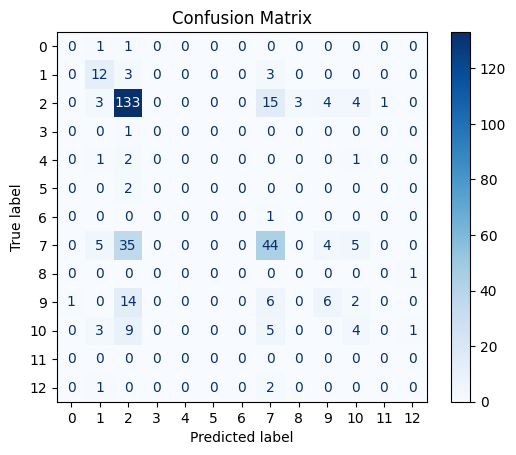

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Global_Landslide_Catalog_Export.csv.zip to Global_Landslide_Catalog_Export.csv.zip


In [ ]:
import zipfile
import os

zip_path = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/data')
os.listdir('/content/data')


['Global_Landslide_Catalog_Export.csv']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    '/content/data',
    target_size=(128, 128),
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/content/data',
    target_size=(128, 128),
    class_mode='binary',
    subset='validation'
)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


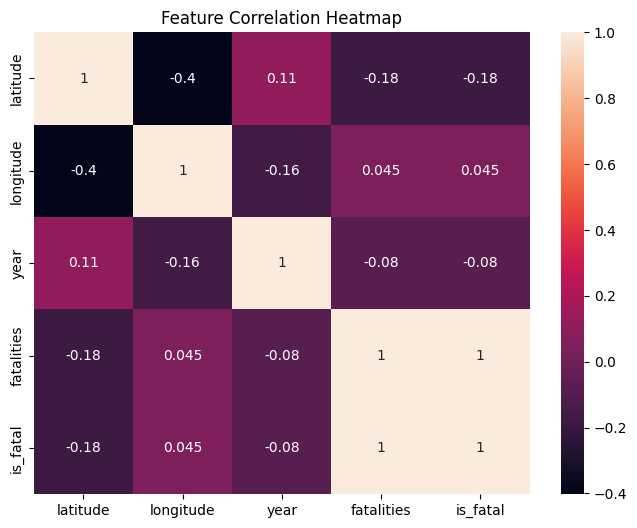

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(df[['latitude', 'longitude', 'year', 'fatalities', 'is_fatal']].corr(), annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()
